In [1]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
%matplotlib inline
from numpy.random import rand
import warnings
warnings.filterwarnings("ignore") 

In [2]:
# Load data
data = pd.read_csv('listings.csv', low_memory=False)

In [3]:
pd.set_option('max_columns', None)
pd.set_option('max_rows', 100)
data.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20190808195507,2019-08-09,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",From week 38 to week 47 maintenance work to th...,The neighbourhood is well served by 24 hours p...,NaN,NaN,Please: - Leave your shoes in the entrance - ...,NaN,NaN,https://a0.muscache.com/im/pictures/10272854/8...,NaN,3159,https://www.airbnb.com/users/show/3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands","Upon arriving in Amsterdam, one can imagine as...",within an hour,100%,NaN,t,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im/users/3159/profile_...,Indische Buurt,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Amsterdam, North Holland, Netherlands",Indische Buurt,Oostelijk Havengebied - Indische Buurt,NaN,Amsterdam,North Holland,NaN,Amsterdam,"Amsterdam, Netherlands",NL,Netherlands,52.36575,4.94142,f,Apartment,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,Wifi,""Paid parking off premises"",""Bu...",NaN,$59.00,NaN,"$1,500.00",$200.00,$60.00,1,$20.00,3,15,3,3,15,15,3.0,15.0,today,t,8,18,43,89,2019-08-09,267,30,2009-03-30,2019-08-05,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{Amsterdam,"" NL Zip Codes 2"","" Amsterdam"","" NL""}",t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.12
1,20168,https://www.airbnb.com/rooms/20168,20190808195507,2019-08-09,Studio with private bathroom in the centre 1,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,Check-in time from 2pm till 10pm (But it doesn...,No need to use any transport! All is within a ...,NaN,"No curfew, free entrance 27/7 with your own ke...",This studio/room takes entire floor and has it...,NaN,NaN,https://a0.muscache.com/im/pictures/69979664/3...,NaN,59484,https://www.airbnb.com/users/show/59484,Alexander,2009-12-02,"Amsterdam, Noord-Holland, The Netherlands",Secondary phone nr. + (Phone number hidden by ...,within an hour,100%,NaN,f,https://a0.muscach

In [4]:
data.shape

(20677, 106)

### Dropping initial columns

Some columns do not provide any value to our analysis and therefore are dropped from the outset. An example is urls and scrapping information among others

In [5]:
initial_drop_cols = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'calendar_last_scraped','is_business_travel_ready']
df = data.drop(initial_drop_cols, axis = 1)
df.set_index('id', inplace=True)

In [6]:
df.shape

(20677, 77)

#### Null vales

In [7]:
df.isna().sum()

experiences_offered                                 0
host_since                                         12
host_response_time                               8541
host_response_rate                               8541
host_acceptance_rate                            20677
host_is_superhost                                  12
host_listings_count                                12
host_total_listings_count                          12
host_has_profile_pic                               12
host_identity_verified                             12
street                                              0
neighbourhood                                     831
neighbourhood_cleansed                              0
neighbourhood_group_cleansed                    20677
city                                                4
state                                             219
zipcode                                           886
market                                             40
smart_location              

Also, if all rows or a great majority of of rows that do not provide any meaningful value are missing, they should be dropped.I will keep the weekly and monthly price for now to compare with the daily price.

In [8]:
df.drop(['host_acceptance_rate','neighbourhood_group_cleansed','square_feet','requires_license','license'], axis=1, inplace=True)

In [9]:
df.shape

(20677, 72)

## Splitting Target Variable from dataset

Here the Target Variable 'Price' is separated from the data for analysis.

In [10]:
df['price'].head()

id
2818      $59.00
20168     $80.00
25428    $125.00
27886    $150.00
28871     $75.00
Name: price, dtype: object

Looks like the columns with prices have dollar signs attached to them therefore the data is not numerical. Removing the $-signs and turning them to numerical after filling in missing values with zero.

In [11]:
price_cols = ['price','weekly_price','monthly_price','security_deposit','cleaning_fee','extra_people']
for col in price_cols:
    df[col] = df[col].str.replace(',', '')
    df[col] = df[col].str.replace('$', '')
    df[col].fillna(0, inplace=True)
    df[col] = df[col].astype(float)

In [12]:
target = df['price']
target.head()

id
2818      59.0
20168     80.0
25428    125.0
27886    150.0
28871     75.0
Name: price, dtype: float64

In [13]:
df['weekly_price'].isna().sum()

0

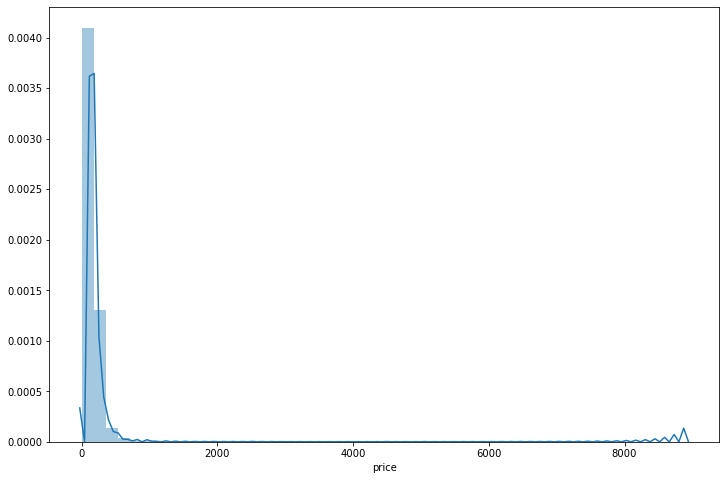

In [14]:
# Visualizing the distribution of price (dependent) variable
plt.figure(figsize=(12,8))
sns.distplot(target, hist=True);

In [15]:
target.describe()

count    20677.000000
mean       159.078686
std        162.464267
min          0.000000
25%         99.000000
50%        130.000000
75%        180.000000
max       8915.000000
Name: price, dtype: float64

Looks like a majority of the prices fall below 1000 dollars with the lowest being 0 dollars and the next several being 9 dollars. We will impute 9 dollars where there is zero and then break the data into two groups and examine each group.

In [16]:
df.loc[df['price'] <= 9, 'price'] = 9
target = df['price']

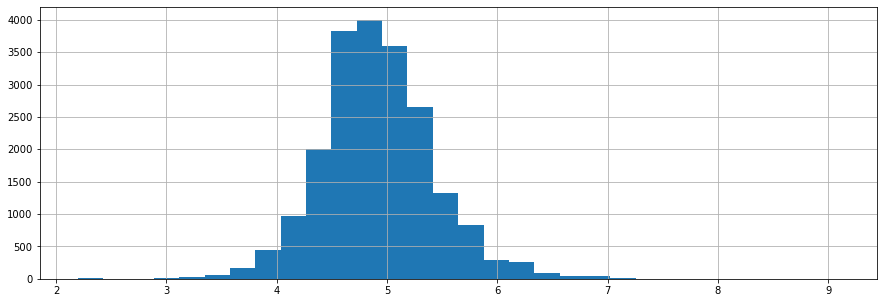

In [17]:
target_log = np.log(target)
target_log.hist(figsize=(15,5), bins=30);

We will leave as is and come back to it later.

## Feature Extraction and Engineering

We go over feature by feature and clean the columns.

In [18]:
df.isna().sum()

experiences_offered                                0
host_since                                        12
host_response_time                              8541
host_response_rate                              8541
host_is_superhost                                 12
host_listings_count                               12
host_total_listings_count                         12
host_has_profile_pic                              12
host_identity_verified                            12
street                                             0
neighbourhood                                    831
neighbourhood_cleansed                             0
city                                               4
state                                            219
zipcode                                          886
market                                            40
smart_location                                     0
country_code                                       0
country                                       

##### Experience offered

In [19]:
df['experiences_offered'].value_counts()

none    20677
Name: experiences_offered, dtype: int64

No experience offered. Dropping column.

In [20]:
df.drop('experiences_offered', axis=1, inplace=True)

##### Host since

Customers usually trust someone who has been longer in the business. This will be considered if it has an effect on the target features.

In [21]:
# convert to datetime
from datetime import datetime, timedelta
df['host_since'] = pd.to_datetime(df.host_since)
df.host_since[:1]

id
2818   2008-09-24
Name: host_since, dtype: datetime64[ns]

In [22]:
# Subtract for last scraped date of 2019-08-09
df['host_days_active'] = (datetime(2019,8,9) -df.host_since).astype('timedelta64[D]')

In [23]:
# Recorder so that it's the first column to stay with host group
col_name = 'host_days_active'
first_cols = df.pop(col_name)
df.insert(0, col_name, first_cols)

In [24]:
# There are 12 missing values for this column. We replace with the median since 
# from a visual inspection the median is a better representation
median_days_active = df.host_days_active.median()
df.host_days_active.fillna(median_days_active, inplace=True)
df[df.host_since.isna()].host_days_active[:1]

id
4806556    1650.0
Name: host_days_active, dtype: float64

In [25]:
df.host_since.fillna((datetime(2019,8,9) -timedelta(days=1650)), inplace=True)

##### Host response rate and time

These two are tied together and it's apparent from the equal number of 8541 missing values. Host response rate is calculated from their response time over the past 365 days. If they respond late more than 24 hours after a guest contacts them, it is counted as late and their rate drops. We will enter Unknown for bboth of them

In [26]:
df.host_response_time.fillna('unknown', inplace=True)
df.host_response_time.value_counts()

unknown               8541
within an hour        6217
within a few hours    3016
within a day          2570
a few days or more     333
Name: host_response_time, dtype: int64

In [27]:
df.groupby('host_response_time').price.median().sort_values(ascending=False)

host_response_time
within a few hours    145.0
within a day          145.0
a few days or more    145.0
within an hour        135.0
unknown               125.0
Name: price, dtype: float64

In [28]:
df.host_response_time.replace({'within a few hours': 'a few hours to days', 
                               'within a day': 'a few hours to days', 
                               'a few days or more': 'a few hours to days'},
                              inplace=True)

In [29]:
# Convert host_respoce_rate to interger, fill with 'Unknown' and make bins of <50%, 50-89%,90-99%, and 100%
df.host_response_rate = df['host_response_rate'].str[:-1].astype(float)
df.host_response_rate = pd.cut(df.host_response_rate, bins=[0, 50, 90, 99, 100], labels=['0-50%', '50-89%', '90-99%', '100%'])

# Convert back to string
df.host_response_rate = df.host_response_rate.astype('str')

df.host_response_rate.replace('nan', 'unknown', inplace=True)
df.host_response_rate.value_counts()

100%       9011
unknown    8721
50-89%     1804
90-99%      809
0-50%       332
Name: host_response_rate, dtype: int64

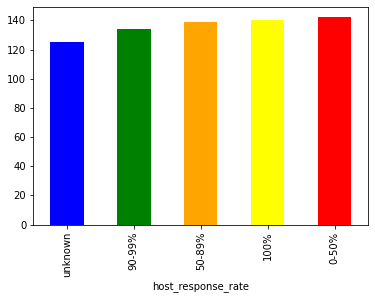

In [30]:
df.groupby('host_response_rate').price.median().sort_values(ascending=True).plot(kind='bar', color=['blue', 'green', 'orange', 'yellow', 'red'])
plt.show()

##### Host is superhost, host_listing_count, host_has_profile_pic, and  host_identity_verified

In [31]:
df.host_is_superhost.value_counts()

f    17451
t     3214
Name: host_is_superhost, dtype: int64

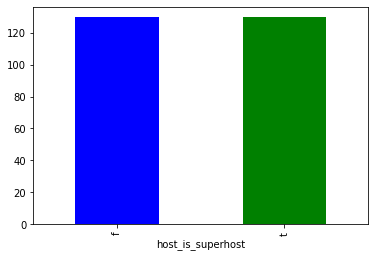

In [32]:
# We will imute false for the missing values since being a superhost is a badge of honor
df['host_is_superhost'].fillna('f', inplace=True)
df.groupby('host_is_superhost').price.median().plot(kind='bar', color=['blue', 'green'])
plt.show()

In [33]:
pivot = pd.pivot_table(df, values='price', index=['host_is_superhost'], aggfunc=np.median)
pivot

,price
host_is_superhost,
f,130.0
t,130.0


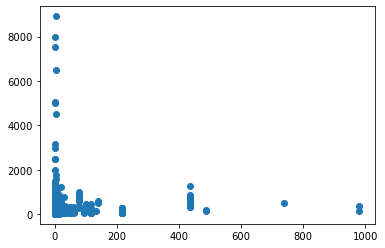

In [34]:
# For host_total_listings_counts, we impute median which will maintain the distribution
df['host_total_listings_count'].fillna(df['host_total_listings_count'].median(), inplace=True)
plt.scatter(df.host_total_listings_count, df.price);

In [35]:
max(df.host_total_listings_count)

980.0

Some of these add no value to our algorithm and will be dropped. We will however retain 'host_total_listings_count'.

In [36]:
df.drop(['host_is_superhost','host_listings_count','host_has_profile_pic','host_identity_verified'], axis=1, inplace=True)

##### street, neighbourhood, neighbourhood_cleansed, city, state, zipcode, market, smart_location, country_code, country, latitude, longitude, is_location_exact, and jurisdiction_names

We just need one feature to represent location. We will rename neighbourhood_cleansed to neighborhood, since it has no missing values and will convert it later to numeric for computational purposes. The rest we will drop.

In [37]:
df['neighbourhood'] = df['neighbourhood_cleansed']

In [38]:
df.drop(['street','neighbourhood_cleansed','city','state','zipcode','market','smart_location','country_code','country','latitude','longitude','is_location_exact','jurisdiction_names'], axis=1, inplace=True)

In [39]:
df.neighbourhood.value_counts()

De Baarsjes - Oud-West                    3549
De Pijp - Rivierenbuurt                   2560
Centrum-West                              2328
Centrum-Oost                              1797
Westerpark                                1530
Zuid                                      1464
Oud-Oost                                  1349
Bos en Lommer                             1180
Oostelijk Havengebied - Indische Buurt     985
Oud-Noord                                  625
Watergraafsmeer                            591
IJburg - Zeeburgereiland                   491
Slotervaart                                404
Noord-West                                 375
Noord-Oost                                 285
Buitenveldert - Zuidas                     260
Geuzenveld - Slotermeer                    226
De Aker - Nieuw Sloten                     154
Osdorp                                     152
Gaasperdam - Driemond                      141
Bijlmer-Centrum                            116
Bijlmer-Oost 

In [40]:
neighbourhood_median_Prices = pd.pivot_table(df, values='price', index=['neighbourhood'], aggfunc=np.median)
neighbourhood_median_Prices = neighbourhood_median_Prices.reindex(neighbourhood_median_Prices['price'].sort_values(ascending=True).index)
neighbourhood_median_Prices

,price
neighbourhood,
Bijlmer-Oost,75.0
Bijlmer-Centrum,80.0
Gaasperdam - Driemond,85.0
Osdorp,91.0
Geuzenveld - Slotermeer,99.0
De Aker - Nieuw Sloten,100.0
Slotervaart,100.0
Oostelijk Havengebied - Indische Buurt,110.0
Bos en Lommer,110.0


In [41]:
# Bunching some neighborhoods that have same median price together
df.neighbourhood.replace({
    'De Aker - Nieuw Sloten': 'De Aker-Slotervaart',
    'Slotervaart': 'De Aker-Slotervaart',
    'Oostelijk Havengebied - Indische Buurt': 'Buurt-Lommer',
    'Bos en Lommer': 'Buurt-Lommer',
    'Buitenveldert - Zuidas': 'Noord-Zuidas',
    'Noord-Oost': 'Noord-Zuidas',
    'Watergraafsmeer': 'Water-park-Noord',
    'Westerpark': 'Water-park-Noord',
    'Oud-Noord': 'Water-park-Noord',
    'Zuid': 'Zuid-Rivierenbuurt',
    'De Pijp - Rivierenbuurt': 'Zuid-Rivierenbuurt',
    'Centrum-Oost': 'Centrum',
    'Centrum-West': 'Centrum'
    }, inplace=True)

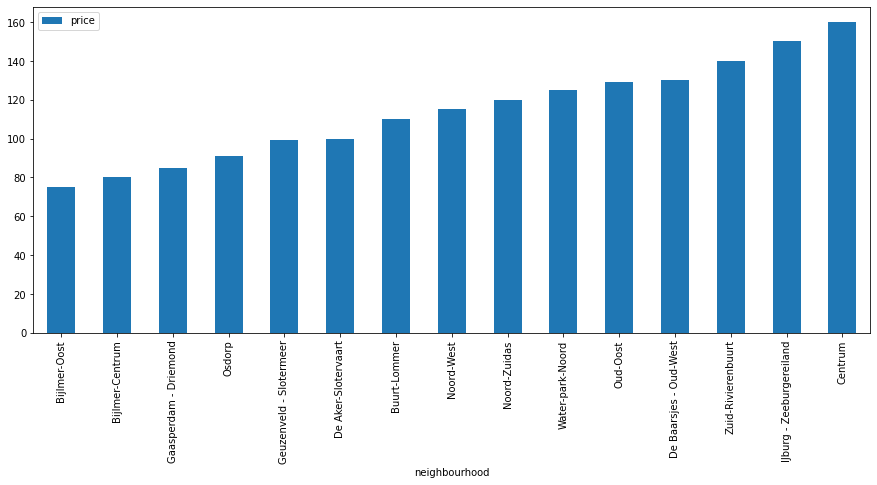

In [42]:
hood_median_Prices = pd.pivot_table(df, values='price', index=['neighbourhood'], aggfunc=np.median)
hood_median_Prices = hood_median_Prices.reindex(hood_median_Prices['price'].sort_values(ascending=True).index)
hood_median_Prices.plot(kind='bar', figsize=(15,6));

##### Property_type and room_type

In [43]:
df.property_type.value_counts()

Apartment                 15832
House                      1641
Townhouse                   671
Bed and breakfast           549
Loft                        392
Boat                        351
Condominium                 334
Houseboat                   290
Guest suite                 146
Aparthotel                  119
Serviced apartment           69
Guesthouse                   49
Boutique hotel               43
Other                        39
Villa                        39
Hostel                       29
Hotel                        23
Cottage                      12
Tiny house                   12
Cabin                        10
Camper/RV                     5
Chalet                        3
Bungalow                      3
Casa particular (Cuba)        3
Barn                          2
Yurt                          2
Earth house                   1
Island                        1
Nature lodge                  1
Lighthouse                    1
Tent                          1
Dome hou

Here we will group similar property types together and for the not so common types, we will group with other.

In [44]:
df.property_type.replace({
    'Townhouse': 'House',
    'Serviced apartment': 'Apartment',
    'Loft': 'Apartment',
    'Bungalow': 'House',
    'Condominium': 'Apartment',
    'Cottage': 'House',
    'Villa': 'House',
    'Tiny house': 'House',
    'Earth house': 'House',
    'Dome house': 'House',
    'Chalet': 'House',
    'Houseboat': 'Boat',
    'Aparthotel': 'Bed and breakfast',
    'Hotel': 'Bed and breakfast',
    'Guesthouse': 'Bed and breakfast',
    'Boutique hotel': 'Bed and breakfast',
    'Hostel': 'Bed and breakfast'
    }, inplace=True)

# Remaining ones renamed other
df.loc[~df.property_type.isin(['Apartment', 'House','Bed and breakfast','Boat']), 'property_type'] = 'Other'

In [45]:
df.property_type.value_counts()

Apartment            16627
House                 2383
Bed and breakfast      812
Boat                   641
Other                  214
Name: property_type, dtype: int64

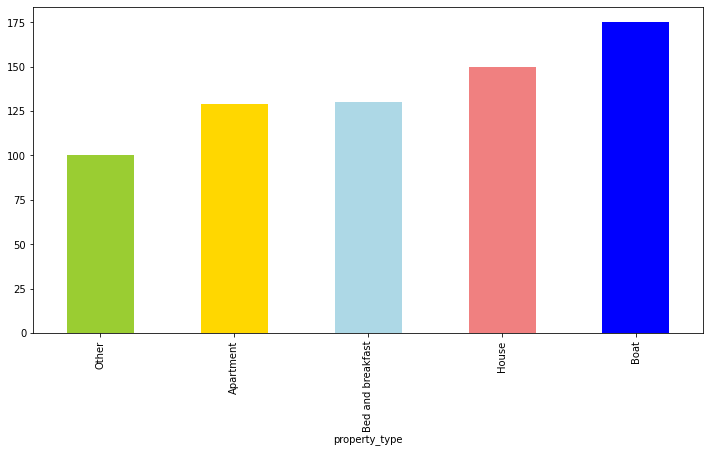

In [46]:
df.groupby('property_type').price.median().sort_values(ascending=True).plot(kind='bar', figsize=(12,6), color=['yellowgreen', 'gold', 'lightblue', 'lightcoral','blue'])
plt.show()

In [47]:
df.room_type.value_counts()

Entire home/apt    16402
Private room        4194
Shared room           81
Name: room_type, dtype: int64

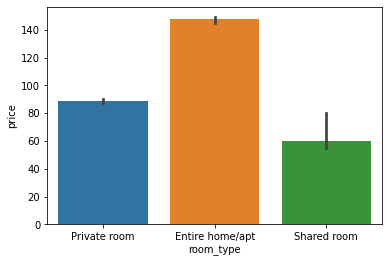

In [48]:
sns.barplot(df.room_type,df.price, estimator=np.median);

##### Bathrooms, bedrooms, and beds

In [49]:
# Replacing missing values with median
features = ['bathrooms','bedrooms','beds']
for feat in features:
    df[feat].fillna(df[feat].median(), inplace=True)

In [50]:
df.bathrooms.value_counts()

1.0     15937
1.5      3272
2.0       966
2.5       252
3.0        81
0.5        75
3.5        42
0.0        28
4.0        15
5.0         3
4.5         2
8.0         2
15.0        1
5.5         1
Name: bathrooms, dtype: int64

In [51]:
def feature_plot(feat, figsize=(8,4)):
    plt.figure(figsize=figsize)
    df.groupby(feat).price.median().plot(kind='bar')
    plt.title(feat)
    plt.xticks(rotation=0)
    plt.show()

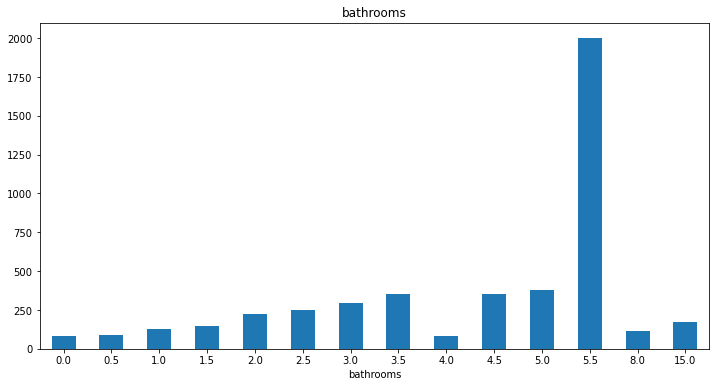

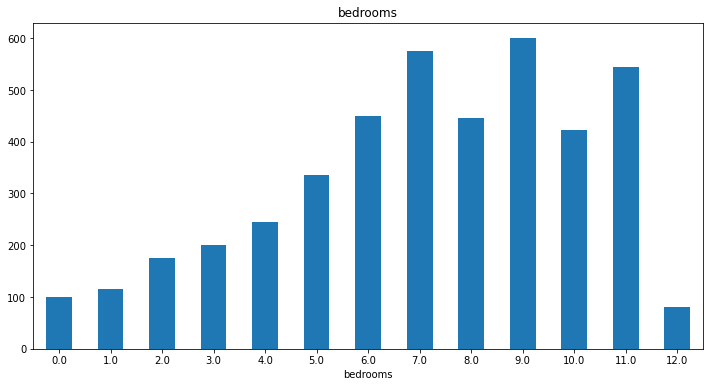

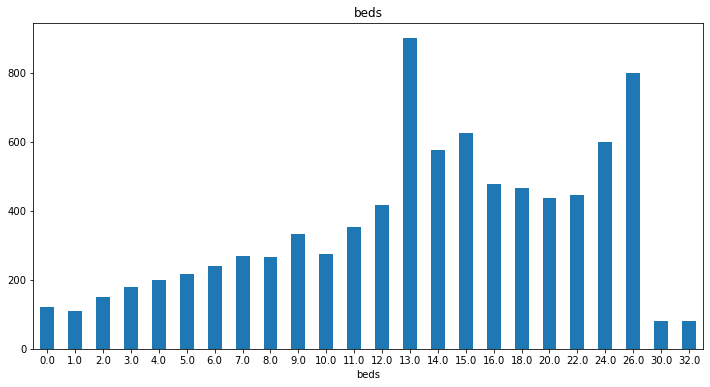

In [52]:
for feature in features:
    feature_plot(feature, figsize=(12,6))  

##### Bed_type

In [53]:
df.bed_type.value_counts()

Real Bed         20498
Pull-out Sofa      119
Futon               40
Airbed              14
Couch                6
Name: bed_type, dtype: int64

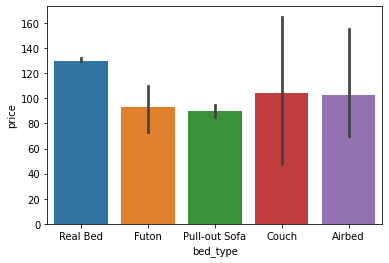

In [54]:
sns.barplot(df.bed_type,df.price, estimator=np.median);

##### Amenities

This feature will not be considered for now and will be removed.

In [55]:
df.drop('amenities', axis=1, inplace=True)

##### Minimum and maximum nights group

Only minimum_nights and maximum_nights should be kept. The rest add no value to the model.

In [56]:
df.drop('minimum_minimum_nights', axis=1, inplace=True)
df.drop('maximum_minimum_nights', axis=1, inplace=True)
df.drop('minimum_maximum_nights', axis=1, inplace=True)
df.drop('maximum_maximum_nights', axis=1, inplace=True)
df.drop('minimum_nights_avg_ntm', axis=1, inplace=True)
df.drop('maximum_nights_avg_ntm', axis=1, inplace=True)

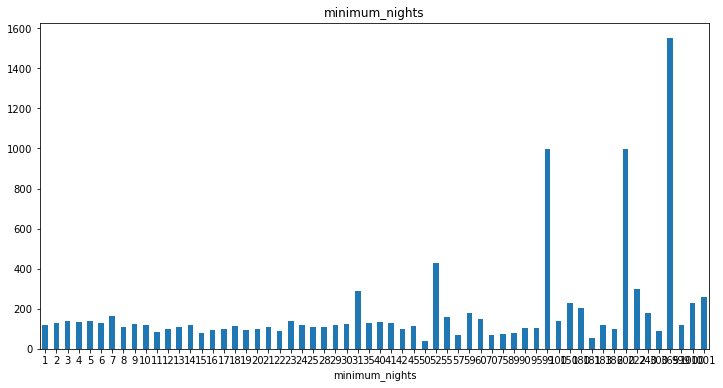

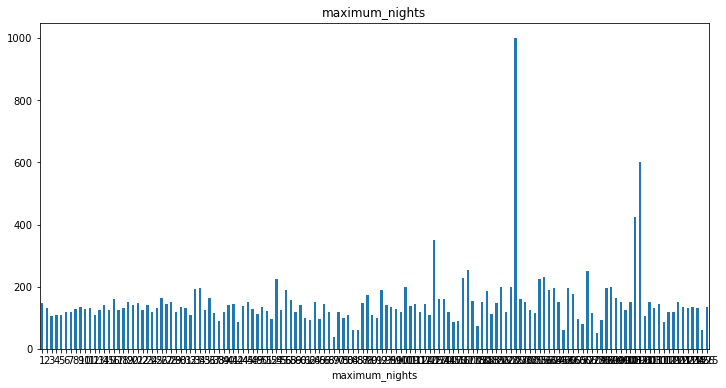

In [57]:
nights = ['minimum_nights', 'maximum_nights']
for night in nights:
    feature_plot(night, figsize=(12,6))

In [58]:
print("Minimum nights mode: ", df.minimum_nights.mode())
print("Maximum nights mode: ", df.maximum_nights.mode())

Minimum nights mode:  0    2
dtype: int64
Maximum nights mode:  0    1125
dtype: int64


There is no pattern in these two columns relating to the median price and will therefore be dropped.

In [59]:
df.drop('minimum_nights', axis=1, inplace=True)
df.drop('maximum_nights', axis=1, inplace=True)

#### Calendar updated

This will be droppEd since it has a high correlation with availability

In [60]:
df.drop('calendar_updated', axis=1, inplace=True)

#### Availability group

Has_avaliability is all 't' so we will drop it. In the city of Amsterdam, rental for entire home/apartment is limtied to 30 nights per calendar year as of 1 Janury, 2019. This does not apply to other types of rentals. However, there is still room to extend the limit if one obtains the necessary permits. Since this will be captured in the 'room_type" feature, we will drop the entire group.

In [61]:
df.drop('has_availability', axis=1, inplace=True)
df.drop('availability_30', axis=1, inplace=True)
df.drop('availability_60', axis=1, inplace=True)
df.drop('availability_90', axis=1, inplace=True)
df.drop('availability_365', axis=1, inplace=True)

#### Review group

In [62]:
df.first_review = pd.to_datetime(df.first_review)
#df.first_review.fillna('no reviews', inplace=True)

#df.drop(['last_review'], axis=1, inplace=True)

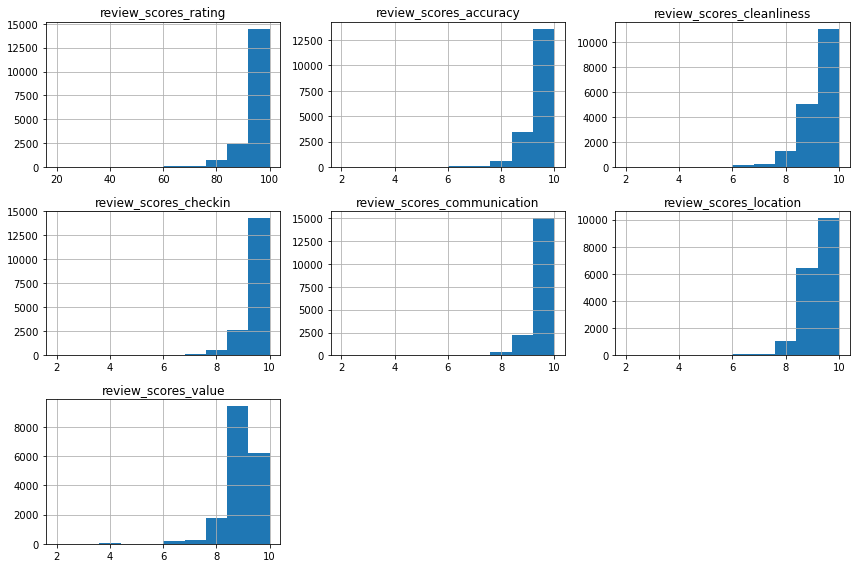

In [63]:
# Pot the distributions of the review columns
review_scores = list(df.columns[df.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(review_scores):
    ax = fig.add_subplot(3,3,i+1)
    df[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

Almost all reviews are above the 60th percentile. We will form an ordinal category with this in mind

In [64]:
# Bin and mpute missing rows with 'none'
df.review_scores_rating = pd.cut(df['review_scores_rating'], 
                                 [0, 79, 94, 100],
                                labels=['0-79/100', '80-94/100', '95-100/100'])
# Create label for missing rows
df.review_scores_rating.replace(np.nan,'no review', inplace=True)

In [65]:
review_scores.pop(0)

for feat in review_scores:
    df[feat] = pd.cut(df[feat], 
                      [0, 8, 9, 10],
                      labels=['0-8/10', '9/10', '10/10'])
    # Create label for missing rows
    df[feat].replace(np.nan,'no review', inplace=True)

In [66]:
df.reviews_per_month.fillna(0, inplace=True)

#### Cancellation_policy

In [67]:
df.cancellation_policy.value_counts()

strict_14_with_grace_period    8003
moderate                       7492
flexible                       5043
super_strict_60                 112
super_strict_30                  26
Name: cancellation_policy, dtype: int64

In [68]:
# Fill in with flexible since it's the most reasonable and the host has 365 availability
df.cancellation_policy.fillna('flexible', inplace=True)

#### Require_guest_profile_pisture and require_guest_phone_verification

In [69]:
df.require_guest_profile_picture.value_counts()

f    20450
t      227
Name: require_guest_profile_picture, dtype: int64

In [70]:
df.require_guest_phone_verification.value_counts()

f    20378
t      299
Name: require_guest_phone_verification, dtype: int64

##### Calculate host listing counts group

This section has some data that will be useful when doing our Exploratory Data Analysis. It is possible that we might drop more features, but tha's what EDA is all about.

## Exploratory Data Analysis

Let's examine the trend for Airbnb in Amsterdam for the period in the data and see how review affected the trend.

#### Hosts joining vs first reviews

In [71]:
# First host
print(f"First host joined : {min(df.host_since).strftime('%Y-%m-%d')}")
# Last host
print(f"Last host joined  : {max(df.host_since).strftime('%Y-%m-%d')}")

First host joined : 2008-09-24
Last host joined  : 2019-08-08


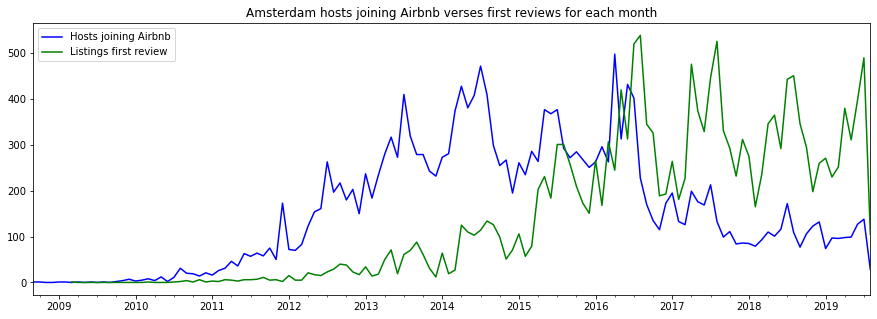

In [72]:
plt.figure(figsize=(15,5))
df.set_index('host_since').resample('MS').size().plot(label='Hosts joining Airbnb', color='blue')
df.set_index('first_review').resample('MS').size().plot(label='Listings first review', color='green')
plt.title('Amsterdam hosts joining Airbnb verses first reviews for each month')
plt.legend()
plt.xlim('2008-09-01', '2019-08-01')
plt.xlabel('')
plt.ylabel('')
plt.show()

We see that while the number of first reviews are going up, the number of hosts joining started declining in the ffirst half of 2016.

Now we drop the first_review and last_review columns

In [73]:
df.drop(['first_review'], axis=1, inplace=True)
df.drop(['last_review'], axis=1, inplace=True)

### Split DataFrame into numerical and categorical

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20677 entries, 2818 to 37590988
Data columns (total 38 columns):
host_days_active                                20677 non-null float64
host_since                                      20677 non-null datetime64[ns]
host_response_time                              20677 non-null object
host_response_rate                              20677 non-null object
host_total_listings_count                       20677 non-null float64
neighbourhood                                   20677 non-null object
property_type                                   20677 non-null object
room_type                                       20677 non-null object
accommodates                                    20677 non-null int64
bathrooms                                       20677 non-null float64
bedrooms                                        20677 non-null float64
beds                                            20677 non-null float64
bed_type                         

In [75]:
df_raw=df.copy()
df.drop('host_since',axis=1, inplace=True)

In [76]:
# save all categorical columns in list
categorical_columns = [col for col in df.columns.values if df[col].dtype == 'object']

# dataframe with categorical features
df_cat = df[categorical_columns]
# dataframe with numerical features
df_num = df.drop(categorical_columns, axis=1)

In [77]:
# Using describe function in numeric dataframe 
df_num.describe()

,host_days_active,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,number_of_reviews,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000
mean,1613.156309,7.007400,2.879335,1.158534,1.454225,1.828892,159.079122,103.130241,175.769454,157.643227,32.688591,1.459351,11.330415,23.290323,6.998597,4.925134,4.492431,0.410988,0.021715,0.863869
std,716.940797,37.718876,1.314935,0.380045,0.894728,1.407402,162.463853,315.802268,762.047849,328.680729,27.348466,0.935662,23.150310,48.619730,14.239550,22.883678,22.710906,1.082794,0.237805,1.303439
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1148.000000,1.000000,2.000000,1.000000,1.000000,1.000000,99.000000,0.000000,0.000000,0.000000,10.000000,1.000000,0.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.140000
50%,1650.000000,1.000000,2.000000,1.000000,1.000000,1.000000,130.000000,0.000000,0.000000,0.000000,30.000000,1.000000,0.000000,9.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.430000
75%,2152.000000,2.000000,4.000000,1.000000,2.000000,2.000000,180.000000,0.000000,0.000000,250.000000,50.000000,2.000000,20.000000,23.000000,7.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,3971.000000,980.000000,30.000000,15.000000,12.000000,32.000000,8915.000000,6000.000000,20000.000000,4736.000000,531.000000,16.000000,280.000000,767.000000,161.000000,208.000000,206.000000,15.000000,8.000000,33.670000


In [78]:
# Printing 5 head observation in categorical dataframe
df_cat.head()

,host_response_time,host_response_rate,neighbourhood,property_type,room_type,bed_type,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
id,,,,,,,,,,,,,,,,,
2818,within an hour,100%,Buurt-Lommer,Apartment,Private room,Real Bed,95-100/100,10/10,10/10,10/10,10/10,10/10,10/10,t,strict_14_with_grace_period,f,f
20168,within an hour,100%,Centrum,House,Private room,Real Bed,80-94/100,9/10,10/10,10/10,10/10,10/10,9/10,f,strict_14_with_grace_period,f,f
25428,within an hour,100%,Centrum,Apartment,Entire home/apt,Real Bed,95-100/100,10/10,10/10,10/10,10/10,10/10,10/10,f,strict_14_with_grace_period,f,f
27886,within an hour,100%,Centrum,Boat,Private room,Real Bed,95-100/100,10/10,10/10,10/10,10/10,10/10,10/10,t,strict_14_with_grace_period,f,f
28871,within an hour,100%,Centrum,Apartment,Private room,Real Bed,95-100/100,10/10,10/10,10/10,10/10,10/10,10/10,f,moderate,f,f


In [79]:
df_num = df_num.drop('price', axis=1)

#### Reducing skewness' for numeric variables

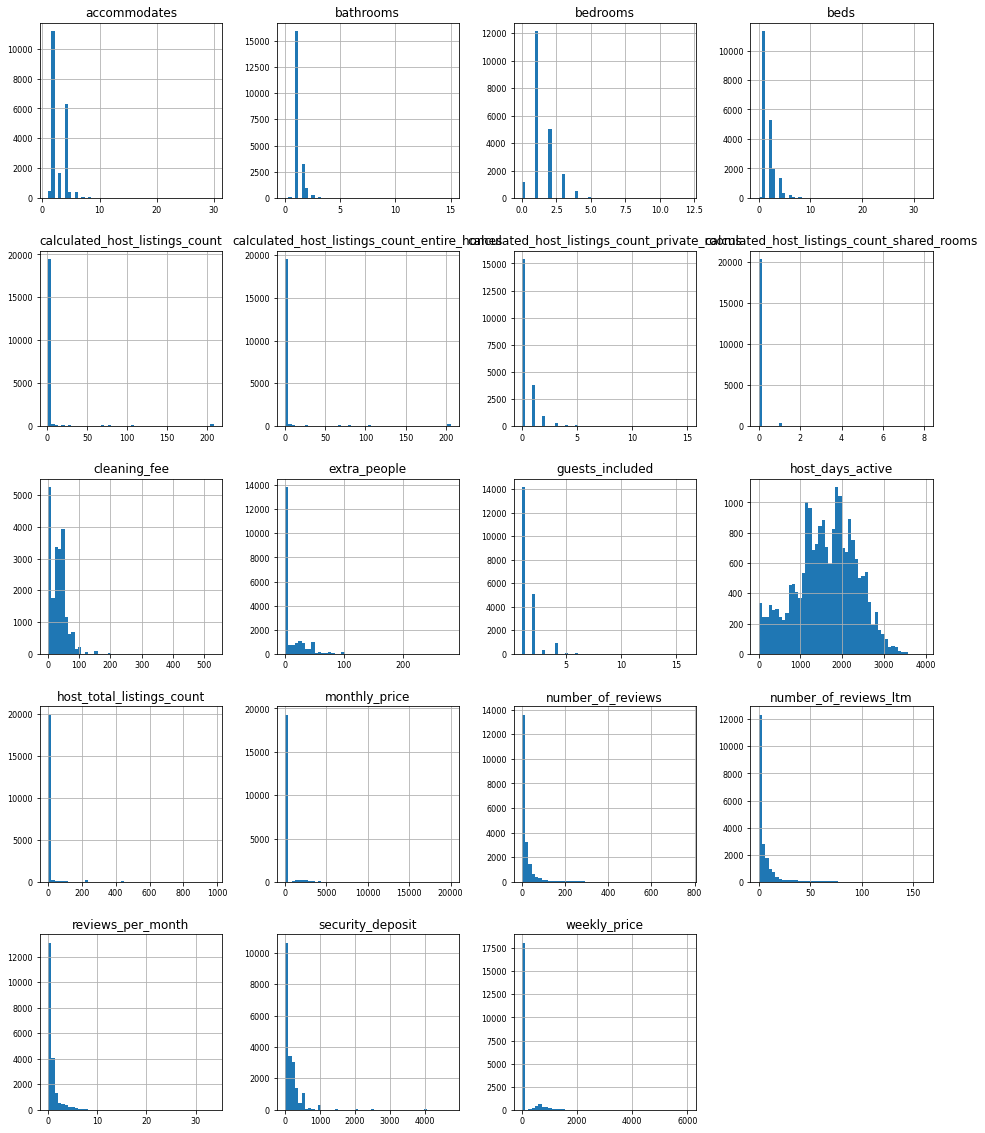

In [80]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [81]:
from scipy.stats import skew
# check for skewness over 75%
df_num_skew = df_num.apply(lambda x: skew(x.dropna()))
df_num_skew = df_num_skew[df_num_skew > .75]

# apply log + 1 transformation for all numeric features with skewnes over .75
df_num[df_num_skew.index] = np.log1p(df_num[df_num_skew.index])

In [82]:
# List of variables with skewness over 0.75
df_num_skew

host_total_listings_count                        9.712629
accommodates                                     3.035133
bathrooms                                        5.457308
bedrooms                                         1.921748
beds                                             5.885202
weekly_price                                     4.266217
monthly_price                                    6.285889
security_deposit                                 6.973125
cleaning_fee                                     2.188632
guests_included                                  4.911856
extra_people                                     4.473722
number_of_reviews                                5.413640
number_of_reviews_ltm                            3.844777
calculated_host_listings_count                   7.680603
calculated_host_listings_count_entire_homes      7.687529
calculated_host_listings_count_private_rooms     6.355184
calculated_host_listings_count_shared_rooms     23.782424
reviews_per_mo

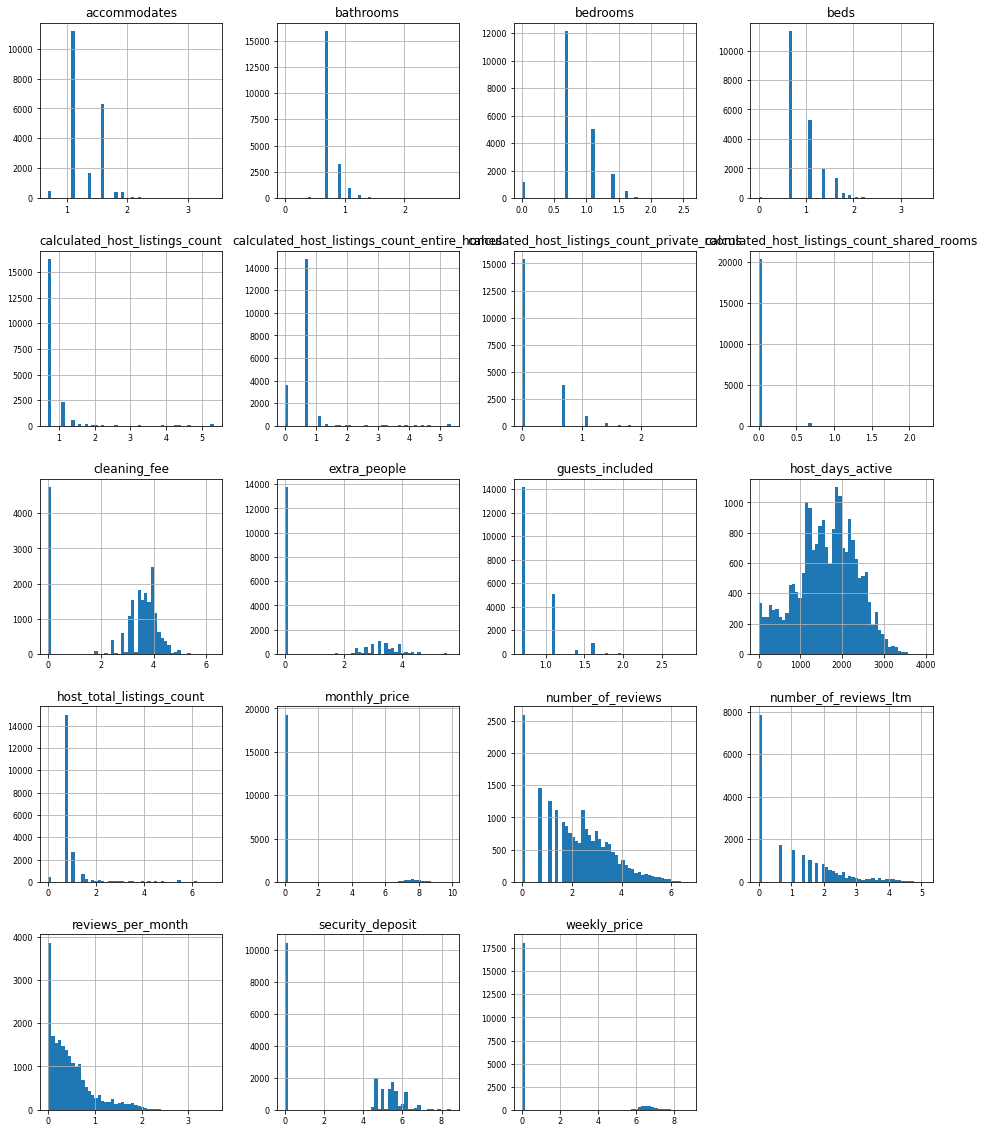

In [83]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

#### Encoding Categorical Features

In [84]:
# Replacing t/f columns with 0/1
df_cat.replace({'t': 1, 'f': 0}, inplace=True)

In [85]:
# Encoding host_response_time
df_cat.host_response_time.replace({'a few hours to days':2,'within an hour':1,'unknown':0}, inplace=True)

In [86]:
# Encoding host_response_rate
df_cat.host_response_rate.replace({'0-50%':4,'100%':3,'50-89%':2,'90-99%':1,'unknown':0}, inplace=True)

In [87]:
# Encoding neighbourhoods
neighbourhood_list = list(df.groupby('neighbourhood').price.median().sort_values(ascending=True).index)
neighbourhood_dict = {}

for i,neighbourhood in enumerate(neighbourhood_list):
    neighbourhood_dict[neighbourhood] = i
    
df_cat.neighbourhood.replace(neighbourhood_dict, inplace=True)

In [88]:
neighbourhood_dict

{'Bijlmer-Oost': 0,
 'Bijlmer-Centrum': 1,
 'Gaasperdam - Driemond': 2,
 'Osdorp': 3,
 'Geuzenveld - Slotermeer': 4,
 'De Aker-Slotervaart': 5,
 'Buurt-Lommer': 6,
 'Noord-West': 7,
 'Noord-Zuidas': 8,
 'Water-park-Noord': 9,
 'Oud-Oost': 10,
 'De Baarsjes - Oud-West': 11,
 'Zuid-Rivierenbuurt': 12,
 'IJburg - Zeeburgereiland': 13,
 'Centrum': 14}

In [89]:
# creating list of remaining categorical columns
cat_columns = list([col for col in df_cat.columns.values if df_cat[col].dtype == 'object'])
cat_columns

['property_type',
 'room_type',
 'bed_type',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'cancellation_policy']

In [90]:
# Defining a multiple encoder
def categorical_encoder(column):
    entry_list = list(df.groupby(column).price.median().sort_values(ascending=True).index)
    entry_dict = {}
    
    for i,entry in enumerate(entry_list):
        entry_dict[entry] = i
        
    df_cat[column].replace(entry_dict, inplace=True)

In [91]:
# Encoding remaining categorical columns
for col in cat_columns:
    categorical_encoder(col)

In [92]:
df_cat.room_type[:1]

id
2818    1
Name: room_type, dtype: int64

In [93]:
df_cat.cancellation_policy[-7:]

id
37581675    1
37582501    2
37584197    0
37584917    0
37586354    1
37586530    2
37590988    0
Name: cancellation_policy, dtype: int64

In [94]:
df_joined = pd.concat([df_num, df_cat], axis=1)

In [95]:
df_joined

,host_days_active,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,number_of_reviews,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_time,host_response_rate,neighbourhood,property_type,room_type,bed_type,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2818,3971.0,0.693147,1.098612,0.916291,0.693147,1.098612,0.000000,7.313887,5.303305,4.110874,0.693147,3.044522,5.590987,3.433987,0.693147,0.000000,0.693147,0.000000,1.137833,1,3,6,1,1,4,2,2,2,2,2,2,1,1,2,0,0
20168,3537.0,1.098612,1.098612,0.693147,0.693147,0.693147,0.000000,0.000000,0.000000,0.000000,1.098612,0.000000,5.648974,4.219508,1.098612,0.000000,1.098612,0.000000,1.241269,1,3,14,3,1,4,0,0,2,2,2,2,2,0,2,0,0
25428,3549.0,1.098612,1.386294,0.693147,0.693147,0.693147,6.478510,7.601402,5.707110,3.713572,1.098612,2.397895,1.386294,1.098612,1.098612,1.098612,0.000000,0.000000,0.148420,1,3,14,1,2,4,2,2,2,2,2,2,1,0,2,0,0
27886,3426.0,0.693147,1.098612,0.693147,0.693147,0.693147,6.698268,7.824446,0.000000,0.000000,0.693147,0.000000,5.278115,3.737670,0.693147,0.000000,0.693147,0.000000,1.134623,1,3,14,4,1,4,2,2,2,2,2,2,1,1,2,0,0
28871,3375.0,1.386294,1.098612,0.693147,0.693147,0.693147,6.214608,7.579168,0.000000,0.000000,0.693147,0.000000,5.648974,4.605170,1.386294,0.000000,1.386294,0.000000,1.278152,1,3,14,1,1,4,2,2,2,2,2,2,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37584197,2267.0,1.386294,1.098612,0.693147,0.693147,0.693147,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.693147,0.000000,0,0,11,1,0,4,3,3,3,3,3,3,3,1,0,0,0
37584917,1.0,0.000000,1.609438,0.693147,1.098612,1.098612,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,0,0,9,3,2,4,3,3,3,3,3,3,3,1,0,0,0
37586354,2135.0,0.000000,1.098612,0.693147,0.693147,0.693147,0.000000,0.000000,5.303305,3.044522,0.693147,2.772589,0.000000,0.000000,0.693147,0.000000,0.693147,0.000000,0.000000,0,0,8,1,1,4,3,3,3,3,3,3,3,0,1,0,0


#### MinMaxScaling

In [96]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
scaler = MinMaxScaler()
newdata=pd.DataFrame(scaler.fit_transform(df_joined), index= df_joined.index, columns=list(df_joined.columns))

### Correlation

In [97]:
df1=newdata
df1.corr()

,host_days_active,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,number_of_reviews,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_time,host_response_rate,neighbourhood,property_type,room_type,bed_type,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
host_days_active,1.000000,-0.045815,0.005189,0.006178,0.057228,0.000723,0.259269,0.212707,0.062476,0.101065,0.110619,0.074318,0.218086,0.012918,-0.061217,-0.013360,-0.065402,-0.080552,-0.065061,0.025731,0.005714,0.023841,-0.035693,0.081453,-0.033276,-0.014305,-0.026500,-0.033534,-0.013319,-0.017052,-0.074925,-0.022693,-0.209416,0.098442,0.146070,0.170137
host_total_listings_count,-0.045815,1.000000,0.045892,0.042380,0.015884,0.057971,-0.074637,-0.031693,0.089624,0.085214,-0.020687,0.053516,-0.051297,0.003994,0.954043,0.839711,0.304252,0.397220,0.008856,0.104446,0.057704,0.078368,-0.009220,-0.021164,0.013954,-0.083162,-0.075605,-0.036996,-0.097184,-0.108236,0.012164,-0.014555,0.200689,0.212330,-0.002876,0.017334
accommodates,0.005189,0.045892,1.000000,0.337743,0.669051,0.802256,0.030102,0.005023,0.143160,0.189487,0.393854,0.239867,-0.051273,-0.034476,0.032278,0.141668,-0.196238,-0.042760,-0.072334,0.070594,0.056522,0.018396,0.231379,0.285798,0.058593,-0.004206,-0.030625,-0.031123,0.002614,-0.002868,-0.009838,0.009989,-0.030630,0.113363,0.002964,0.010712
bathrooms,0.006178,0.042380,0.337743,1.000000,0.378098,0.366059,0.000458,-0.010883,0.059632,0.097220,0.152312,0.055508,-0.061666,-0.017821,0.033103,0.051880,-0.025674,-0.019611,-0.036095,0.071242,0.086636,0.040940,0.176621,0.067172,0.025201,0.056626,0.029408,0.040329,0.028309,0.035524,0.055675,0.019600,-0.010740,0.071856,0.018043,0.020090
bedrooms,0.057228,0.015884,0.669051,0.378098,1.000000,0.704059,0.045051,-0.004108,0.127578,0.168515,0.279861,0.124882,-0.100880,-0.093058,0.007257,0.099219,-0.175267,-0.017090,-0.152166,0.047443,0.020628,-0.017318,0.250608,0.236904,0.060951,0.045357,0.009580,0.007085,0.024891,0.026976,-0.002273,0.007761,-0.092346,0.097464,0.018011,0.017006
beds,0.000723,0.057971,0.802256,0.366059,0.704059,1.000000,0.044532,0.011439,0.131652,0.155153,0.358539,0.196129,-0.034531,-0.017236,0.043506,0.108603,-0.121287,-0.008669,-0.058078,0.070891,0.061050,0.008946,0.302714,0.191445,0.047880,0.003971,-0.028394,-0.014922,0.015406,0.004845,-0.000890,0.013663,-0.016590,0.113332,0.012757,0.016192
weekly_price,0.259269,-0.074637,0.030102,0.000458,0.045051,0.044532,1.000000,0.619870,0.065038,0.045784,0.126574,0.072931,0.212522,0.005164,-0.082117,-0.052318,-0.066030,-0.035926,-0.024667,-0.000710,-0.009971,0.037719,0.016445,0.049574,-0.031049,-0.036665,-0.047169,-0.046210,-0.011880,-0.021912,-0.047564,0.000068,-0.105904,0.074521,0.073803,0.081113
monthly_price,0.212707,-0.031693,0.005023,-0.010883,-0.004108,0.011439,0.619870,1.000000,0.057859,0.041349,0.099478,0.086956,0.203607,0.043152,-0.040114,-0.033363,-0.018767,-0.021109,0.031956,0.032401,0.021143,0.043201,-0.004782,0.005559,-0.037516,-0.038132,-0.041589,-0.038593,-0.018411,-0.019864,-0.027454,0.006308,-0.057839,0.067433,0.073027,0.105614
security_deposit,0.062476,0.089624,0.143160,0.059632,0.127578,0.131652,0.065038,0.057859,1.000000,0.410419,0.184835,0.191924,0.089540,0.009948,0.082264,0.152013,-0.118704,0.009475,-0.035248,0.009844,0.013585,0.055382,0.005046,0.173744,0.005434,-0.078832,-0.068716,-0.053870,-0.106044,-0.089747,-0.068067,-0.040277,-0.104652,0.255310,0.060197,0.065516
cleaning_fee,0.101065,0.085214,0.189487,0.097220,0.168515,0.155153,0.045784,0.041349,0.410419,1.000000,0.196080,0.1

### Correlation plot

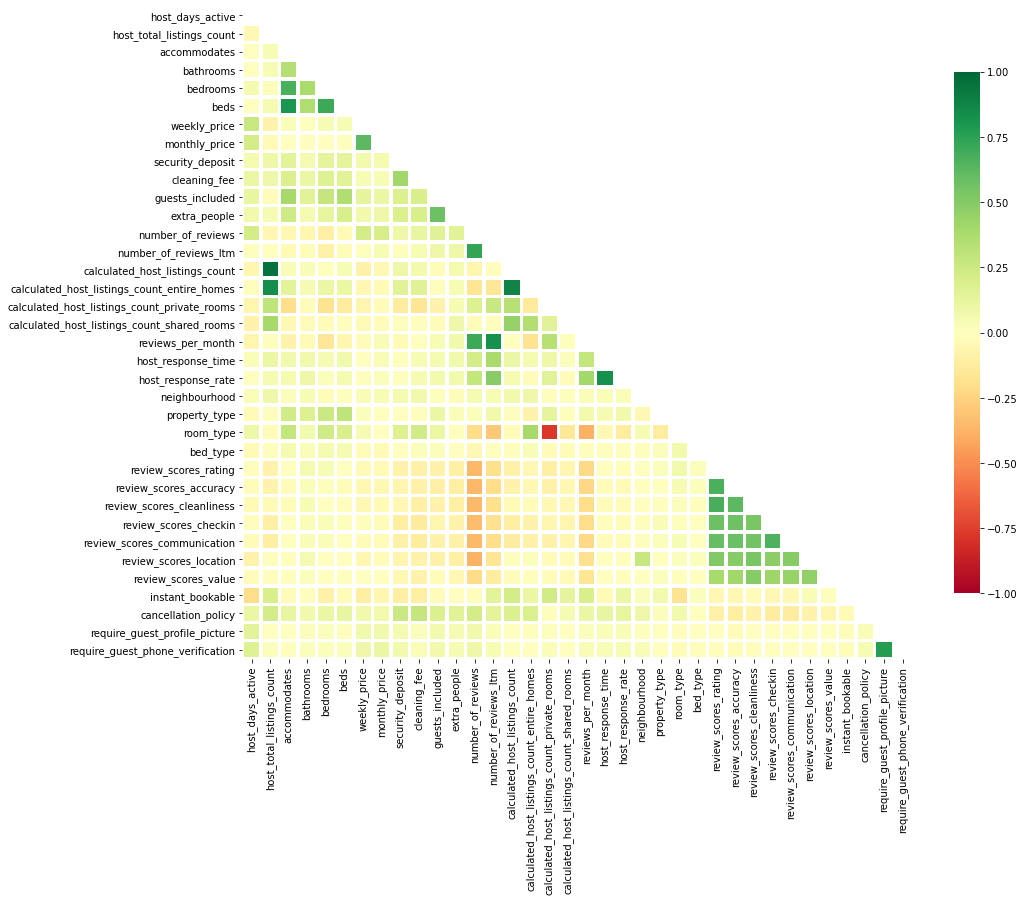

In [98]:
corr_df = df1.corr()

mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
#f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(15,12))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_df, mask=mask, cmap='RdYlGn', vmax=1.0, vmin=-1, linewidths=2.5, cbar_kws={"shrink": .8})

plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

### Linear Regression Modeling

##### Data Preparation

In [99]:
# Splitting the dataset into train & test
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(newdata, target_log, test_size = 0.20, random_state=0)
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

x_train  (16541, 36)
x_test  (4136, 36)
y_train  (16541,)
y_test  (4136,)


### Building the Linear Regression Base Model

In [100]:
import statsmodels.api as sm

# Linear regression model using statsmodel OLS
model = sm.OLS(y_train, x_train).fit() # y_train comes first

# Model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                          6.562e+04
Date:                Tue, 26 May 2020   Prob (F-statistic):                        0.00
Time:                        00:44:47   Log-Likelihood:                         -8764.8
No. Observations:               16541   AIC:                                  1.760e+04
Df Residuals:                   16505   BIC:                                  1.788e+04
Df Model:                          36                                                  
Covariance Type:            nonrobust                                                  
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
host_days_active                                -0.0099      0.020     -0.493      0.622      -0.049       0.029
host_total_listings_count                        1.6532      0.089     18.535      0.000       1.478       1.828
accommodates                                     1.2846      0.055     23.448      0.000       1.177       1.392
bathrooms                                        1.7510      0.066     26.608      0.000       1.622       1.880
bedrooms                                         0.3441      0.037      9.341      0.000       0.272       0.416
beds                                             0.3321      0.059      5.645      0.000       0.217       0.447
weekly_price                                    -0.0081      0.017     -0.481      0.631      -0.041       0.025
monthly_price                                   -0.0060      0.021     -0.287      0.774      -0.047       0.035
security_deposit                                 0.0305      0.011      2.762      0.006       0.009       0.052
cleaning_fee                                     0.0355      0.015      2.428      0.015       0.007       0.064
guests_included                                  0.1568      0.034      4.668      0.000       0.091       0.223
extra_people                                    -0.1393      0.014     -9.873      0.000      -0.167      -0.112
number_of_reviews                                0.0977      0.030      3.274      0.001       0.039       0.156
number_of_reviews_ltm                           -0.0273      0.027     -1.005      0.315      -0.081       0.026
calculated_host_listings_count                  -1.9693      0.171    -11.517      0.000      -2.304      -1.634
calculated_host_listings_count_entire_homes      0.4044      0.161      2.511      0.012       0.089       0.720
calculated_host_listings_count_private_rooms     0.9954      0.066     15.023      0.000       0.866       1.125
calculated_host_listings_count_shared_rooms      1.1052      0.076     14.452      0.000       0.955       1.255
reviews_per_month                                0.1744      0.049      3.594      0.000       0.079       0.270
host_response_time                               0.0316      0.014      2.229      0.026       0.004       0.059
host_response_rate                               0.0976      0.017      5.671      0.000       0.064       0.131
neighbourhood                                    0.6709      0.016     41.744      0.000       0.639       0.702
property_type                                    0.0775      0.017      4.550      0.000       0.044       0.111
room_type                                     

#### Model evaluation metrics

We will use R-Squared, Adj.R-Squared, and RMSE

In [101]:
def rmse(predictions, targets):
    differences = predictions - targets                       # the DIFFERENCEs.
    differences_squared = differences ** 2                    # the SQUAREs of ^
    mean_of_differences_squared = differences_squared.mean()  # the MEAN of ^
    rmse_val = np.sqrt(mean_of_differences_squared)           # ROOT of ^

    return rmse_val

In [102]:
cols = ['Model', 'R-Squared Value', 'Adj.R-Squared Value', 'RMSE']
models_report = pd.DataFrame(columns = cols)
# Predicting the model on test data
pred = model.predict(x_test)

In [103]:
report = pd.Series({'Model': " Base Linear Regression Model",
                 'R-Squared Value' : model.rsquared,
                 'Adj.R-Squared Value': model.rsquared_adj,
                 'RMSE': rmse(pred, y_test)})

model_report = models_report.append(report, ignore_index = True)
model_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,Base Linear Regression Model,0.993062,0.993047,0.407614


#### Model with Constant

In [104]:
df_const = sm.add_constant(newdata)

In [105]:
# Split train1-test1
x_train1,x_test1, y_train1, y_test1 = train_test_split(df_const, target_log, test_size = 0.30, random_state=0)
# model1 using OLS 
model1 = sm.OLS(y_train1, x_train1).fit()
# summary
#model1.summary()

In [106]:
# Predicting the model on test data
pred1 = model1.predict(x_test1)
report1 = pd.Series({'Model': " Linear Reg Model1 with constant",
                 'R-Squared Value' : model1.rsquared,
                 'Adj.R-Squared Value': model1.rsquared_adj,
                 'RMSE': rmse(pred1, y_test1)})

model1_report = model_report.append(report1, ignore_index = True)
model1_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,Base Linear Regression Model,0.993062,0.993047,0.407614
1,Linear Reg Model1 with constant,0.476301,0.474995,0.377733


#### Multicollinearity: Variance Inflation Factor(VIF)

In regression, "multicollinearity" refers to predictors that are correlated with other predictors.  Multicollinearity occurs when your model includes multiple factors that are correlated not just to your response variable, but also to each other.
![](https://www.displayr.com/wp-content/uploads/2018/04/Screen-Shot-2018-04-06-at-10.32.14-am.png)
A rule of thumb for interpreting the variance inflation factor:

* 1 = not correlated.
* Between 1 and 5 = moderately correlated.
* Greater than 5 = highly correlated.

In [107]:
# Printing the VIF
print ("\nVariance Inflation Factor")
cnames = x_train1.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train1[yvar],(x_train1[xvars]))
    res = mod.fit()
    vif = 1/(1-(res.rsquared))
    print (yvar,round(vif,3))


Variance Inflation Factor
const 283.4
host_days_active 1.285
host_total_listings_count 10.983
accommodates 3.322
bathrooms 1.218
bedrooms 2.27
beds 3.49
weekly_price 1.763
monthly_price 1.671
security_deposit 1.289
cleaning_fee 1.356
guests_included 1.789
extra_people 1.598
number_of_reviews 3.896
number_of_reviews_ltm 4.189
calculated_host_listings_count 72.593
calculated_host_listings_count_entire_homes 54.888
calculated_host_listings_count_private_rooms 11.21
calculated_host_listings_count_shared_rooms 1.467
reviews_per_month 4.144
host_response_time 3.326
host_response_rate 3.688
neighbourhood 1.191
property_type 1.175
room_type 4.527
bed_type 1.016
review_scores_rating 2.515
review_scores_accuracy 2.239
review_scores_cleanliness 2.393
review_scores_checkin 2.135
review_scores_communication 2.261
review_scores_location 2.045
review_scores_value 1.513
instant_bookable 1.238
cancellation_policy 1.241
require_guest_profile_picture 2.4
require_guest_phone_verification 2.433


##### Variables above 100 VIF

In [108]:
def cols_above_vif(cnames, thres):
    features = []
    for i in np.arange(0,len(cnames)):
        xvars = list(cnames)
        yvar = xvars.pop(i)
        mod = sm.OLS(x_train1[yvar],(x_train1[xvars]))
        res = mod.fit()
        vif = 1/(1-(res.rsquared))
        if vif >= thres:
            features.append(yvar)
    return features

In [109]:
VIF_100 = cols_above_vif(cnames, 100)
VIF_100

['const']

In [110]:
# Removing Variables above 100 VIF
to_retain = [x for x in x_train1 if x not in VIF_100]
x_train2 = x_train1[to_retain]

In [111]:
to_retain = [x for x in x_test1 if x not in VIF_100]
x_test2 = x_test1[to_retain]

#### Model2 after removing VIF_100

In [112]:
# we keep y_train1 for training with new x_train2
model2 = sm.OLS(y_train1,x_train2).fit()

# Summary
#model2.summary()

In [113]:
# Predicting the model on test data
pred2 = model2.predict(x_test2)
report2 = pd.Series({'Model': " Linear Reg Model2 after VIF100 filter",
                 'R-Squared Value' : model2.rsquared,
                 'Adj.R-Squared Value': model2.rsquared_adj,
                 'RMSE': rmse(pred2, y_test1)})

model2_report = model1_report.append(report2, ignore_index = True)
model2_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,Base Linear Regression Model,0.993062,0.993047,0.407614
1,Linear Reg Model1 with constant,0.476301,0.474995,0.377733
2,Linear Reg Model2 after VIF100 filter,0.993096,0.993079,0.411714


#### Checking variable having VIF above 10

In [114]:
# Checking for vif_10
cnames2 = x_train2.columns
VIF_10 = cols_above_vif(cnames2, 10)
VIF_10

['host_total_listings_count',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'number_of_reviews',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'neighbourhood',
 'room_type',
 'bed_type',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location']

In [115]:
# Removing Variables above 10 VIF
to_retrain3 = [x for x in x_train2 if x not in VIF_10]
x_train3 = x_train2[to_retrain3]

#### Model3 after removing VIF above 10

In [116]:
model3 = sm.OLS(y_train1,x_train3).fit()

# Summary
#model3.summary()

In [117]:
# Removing Variables above 10 VIF
to_retest3 = [x for x in x_test2 if x not in VIF_10]
x_test3 = x_test2[to_retest3]

In [118]:
# Predicting the model on test data
pred3 = model3.predict(x_test3)
report3 = pd.Series({'Model': " Linear Reg Model3  after VIF10 filter",
                 'R-Squared Value' : model3.rsquared,
                 'Adj.R-Squared Value': model3.rsquared_adj,
                 'RMSE': rmse(pred3, y_test1)})

model3_report = model2_report.append(report3, ignore_index = True)
model3_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,Base Linear Regression Model,0.993062,0.993047,0.407614
1,Linear Reg Model1 with constant,0.476301,0.474995,0.377733
2,Linear Reg Model2 after VIF100 filter,0.993096,0.993079,0.411714
3,Linear Reg Model3 after VIF10 filter,0.951246,0.951181,1.094270


#### Checking variable having VIF above 5

In [119]:
# Checking for vif_5
cnames = x_train3.columns
VIF_5 = cols_above_vif(cnames, 5)
VIF_5

['host_days_active',
 'number_of_reviews_ltm',
 'reviews_per_month',
 'host_response_time',
 'host_response_rate']

In [120]:
# Removing Variables above 5 VIF
to_retain = [x for x in x_train3 if x not in VIF_5]
x_train4 = x_train3[to_retain]

#### Model4 after removing VIF above 5

In [121]:
model4 = sm.OLS(y_train1,x_train4).fit()

# Summary
#model4.summary()

In [122]:
# Removing Variables above 5 VIF for x_test
to_retain = [x for x in x_test3 if x not in VIF_5]
x_test4 = x_test3[to_retain]

In [123]:
# Predicting the model on test data
pred4 = model4.predict(x_test4)
report4 = pd.Series({'Model': " Linear Regr Model4 after VIF5 filter",
                 'R-Squared Value' : model4.rsquared,
                 'Adj.R-Squared Value': model4.rsquared_adj,
                 'RMSE': rmse(pred4, y_test1)})

model4_report = model3_report.append(report4, ignore_index = True)
model4_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,Base Linear Regression Model,0.993062,0.993047,0.407614
1,Linear Reg Model1 with constant,0.476301,0.474995,0.377733
2,Linear Reg Model2 after VIF100 filter,0.993096,0.993079,0.411714
3,Linear Reg Model3 after VIF10 filter,0.951246,0.951181,1.094270
4,Linear Regr Model4 after VIF5 filter,0.932228,0.932163,1.297043


#### Removing features based on insignificant variables using the P-value

In [124]:
X = x_train2
Y = y_train1

In [125]:
def feature_selection(X, Y, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out = 0.05, 
                       verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(Y, sm.add_constant((X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(Y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = feature_selection(X, Y)

print('resulting features:')
print(result)

Add  accommodates                   with p-value 0.0
Add  neighbourhood                  with p-value 0.0
Add  room_type                      with p-value 2.90298e-260
Add  bathrooms                      with p-value 4.51878e-81
Add  review_scores_location         with p-value 1.01522e-66
Add  host_response_rate             with p-value 1.09196e-59
Add  bedrooms                       with p-value 1.35367e-41
Add  cancellation_policy            with p-value 9.78991e-35
Add  extra_people                   with p-value 8.02991e-29
Add  review_scores_rating           with p-value 7.34094e-18
Add  guests_included                with p-value 2.02278e-18
Add  host_days_active               with p-value 2.72188e-14
Add  calculated_host_listings_count_shared_rooms with p-value 4.07416e-06
Add  beds                           with p-value 5.76933e-05
Add  number_of_reviews              with p-value 0.000132758
Add  cleaning_fee                   with p-value 0.000594284
Add  instant_bookable     

In [126]:
x_train5 = x_train2[result]
x_test5 = x_test2[result]

#### Model5 p-value method

In [127]:
model5 = sm.OLS(y_train1,x_train5).fit()
# Summary
#model5.summary()

In [128]:
# Predicting the model on test data
pred5 = model5.predict(x_test5)
report5 = pd.Series({'Model': " Linear Reg Model5 after p-value filter",
                 'R-Squared Value' : model5.rsquared,
                 'Adj.R-Squared Value': model5.rsquared_adj,
                 'RMSE': rmse(pred5, y_test1)})

model5_report = model4_report.append(report5, ignore_index = True)
model5_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,Base Linear Regression Model,0.993062,0.993047,0.407614
1,Linear Reg Model1 with constant,0.476301,0.474995,0.377733
2,Linear Reg Model2 after VIF100 filter,0.993096,0.993079,0.411714
3,Linear Reg Model3 after VIF10 filter,0.951246,0.951181,1.094270
4,Linear Regr Model4 after VIF5 filter,0.932228,0.932163,1.297043
5,Linear Reg Model5 after p-value filter,0.992992,0.992980,0.415761


### Using XGBoost Model

In [129]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [130]:
# Loading the cleaned data
X, y = newdata, target_log

In [131]:
X.shape

(20677, 36)

In [132]:
#Matrix converts dataset to an optimized data structure
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [133]:
# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("X_train ",x_train.shape)
print("X_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

X_train  (16541, 36)
X_test  (4136, 36)
y_train  (16541,)
y_test  (4136,)


In [134]:
# Instantiating the XGBoost regressor
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [135]:
# Model fit
xg_reg.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=10,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [136]:
# Predicted RMSE score
preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 1.619184


### k-fold Cross Validation with XGBoost

In [137]:
# Building a 3-fold cross validation model
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

# Store results in cv_results
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=0)
cv_results.head(3)

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,4.004095,0.004266,4.004092,0.009629
1,3.609265,0.003787,3.609481,0.009988
2,3.254199,0.003488,3.254418,0.010189


In [138]:
cv_results.tail(3)

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
47,0.357931,0.001873,0.363780,0.004709
48,0.356958,0.001961,0.362922,0.004488
49,0.355990,0.001677,0.362064,0.004654


#### Visualize importance of features according to model

In [139]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

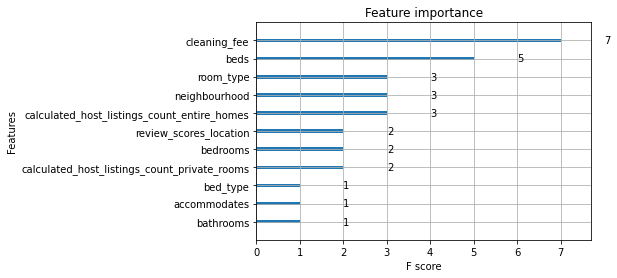

In [140]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [8, 10]
plt.show()